In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import Adam
from keras.utils import to_categorical

In [27]:
def train_number_classifier(iterations):
    # Perceiving - load digit data directly from keras
    (X_train, y_train), (X_test, y_test) = mnist.load_data()

    # Deciding - Normalize data
    X_train = X_train.astype('float32') / 255
    X_test = X_test.astype('float32') / 255

    # Deciding - One-hot encode labels
    y_train = to_categorical(y_train, 10)
    y_test = to_categorical(y_test, 10)

    # Build a simple neural network model
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])

    # Compile the model
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

    # Acting & Feedback - Train the model
    model.fit(X_train, y_train, epochs=iterations, batch_size=32, validation_split=0.8, verbose=2)

    # Evaluate the model on the test set
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    print(f'Accuracy of the model after {iterations} training epochs: {test_acc:.2f}')
    return model
    
    
def plot_mnist_10x10():
    # Load MNIST data
    (X, y), _ = mnist.load_data()
    X = X.reshape(-1, 28, 28)  # Reshape to 28x28 images
    
    # Set up the figure with a specified size
    plt.figure(figsize=(10, 10))

    # Plot the first 100 digits in a 10x10 grid
    for i in range(100):
        plt.subplot(10, 10, i + 1)
        plt.imshow(X[i], cmap='gray')
        plt.axis('off')  # Turn off axis numbering
        plt.title(y[i], fontsize=8)

    plt.tight_layout()  # Adjust subplots to fit into figure area.
    plt.show()

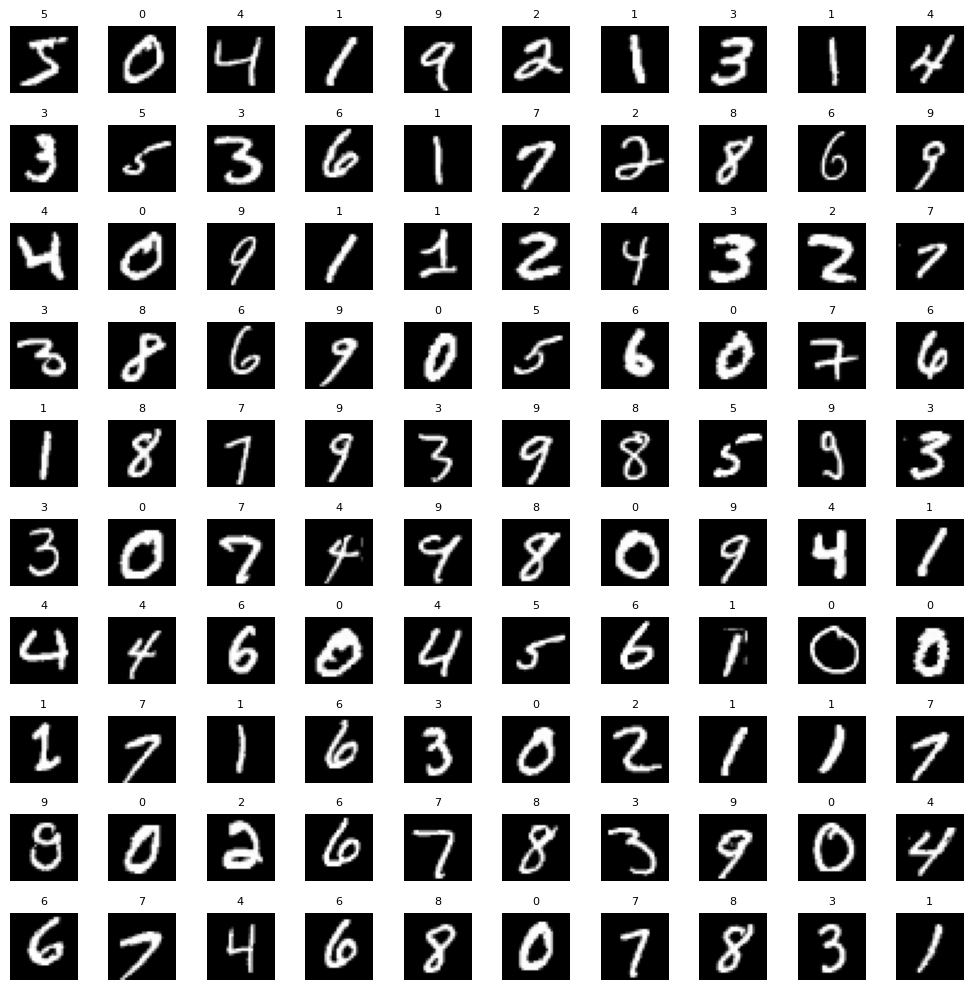

In [19]:
plot_mnist_10x10()

In [28]:
model = train_number_classifier(10)

Epoch 1/10
375/375 - 2s - loss: 0.4858 - accuracy: 0.8647 - val_loss: 0.3054 - val_accuracy: 0.9124 - 2s/epoch - 6ms/step
Epoch 2/10
375/375 - 2s - loss: 0.2334 - accuracy: 0.9338 - val_loss: 0.2413 - val_accuracy: 0.9303 - 2s/epoch - 5ms/step
Epoch 3/10
375/375 - 2s - loss: 0.1667 - accuracy: 0.9537 - val_loss: 0.2165 - val_accuracy: 0.9366 - 2s/epoch - 4ms/step
Epoch 4/10
375/375 - 2s - loss: 0.1289 - accuracy: 0.9634 - val_loss: 0.1850 - val_accuracy: 0.9451 - 2s/epoch - 5ms/step
Epoch 5/10
375/375 - 2s - loss: 0.0993 - accuracy: 0.9732 - val_loss: 0.1785 - val_accuracy: 0.9475 - 2s/epoch - 5ms/step
Epoch 6/10
375/375 - 2s - loss: 0.0797 - accuracy: 0.9798 - val_loss: 0.1722 - val_accuracy: 0.9503 - 2s/epoch - 4ms/step
Epoch 7/10
375/375 - 2s - loss: 0.0621 - accuracy: 0.9840 - val_loss: 0.1787 - val_accuracy: 0.9480 - 2s/epoch - 4ms/step
Epoch 8/10
375/375 - 2s - loss: 0.0472 - accuracy: 0.9892 - val_loss: 0.1637 - val_accuracy: 0.9512 - 2s/epoch - 4ms/step
Epoch 9/10
375/375 - 2s 

In [58]:
(train_images, train_labels), (_, _) = mnist.load_data()

digit_samples = {}

for i, label in enumerate(train_labels):
    if label not in digit_samples:
        digit_samples[label] = train_images[i]
    if len(digit_samples) == 10:
        break

for digit, image in digit_samples.items():
    plt.imsave(f'{digit}.png', image, cmap='gray')

print("Images saved as 0.png, 1.png, ..., 9.png")

Images saved as 0.png, 1.png, ..., 9.png


In [57]:
from keras.models import load_model
from PIL import Image
import numpy as np

# Load the image file
img = Image.open('9.png').convert('L').resize((28, 28))

# Normalize and reshape the image for prediction
img_array = np.array(img)/255.0
img_array = img_array.reshape(1, 28, 28, 1)  # Make sure the shape matches your model's input

# Predict the digit
prediction = model.predict(img_array)
predicted_number = np.argmax(prediction)
print(f"Predicted Number: {predicted_number}")


1/1 [==============================] - 0s 25ms/step
Predicted Number: 9
